# Structural Mechanics

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, LinearRegression
import time

from scipy import io
from matplotlib import cm

from RF import *

## High resolution and high data

In [3]:
# Get Data

Inputs = np.load('StructuralMechanics_inputs.npy')
Outputs = np.load('StructuralMechanics_outputs.npy')

# transpose it and then it is easy to reshape

Inputs = Inputs[:,0,:]
Outputs = Outputs.transpose((2,1,0))

# flatten it

Inputs_fl = Inputs.T.reshape(len(Inputs.T), 41)
Outputs_fl = Outputs.reshape(40000, 41*41)


# train_test split
Ntrain = 20000
x_train = Inputs_fl[:Ntrain]
x_test = Inputs_fl[Ntrain:]

y_train = Outputs_fl[:Ntrain]
y_test = Outputs_fl[Ntrain:]

# check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20000, 41), (20000, 1681), (20000, 41), (20000, 1681))

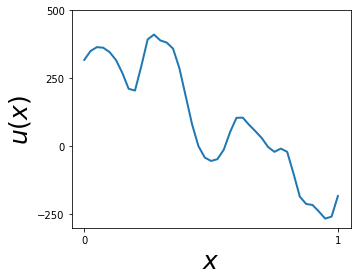

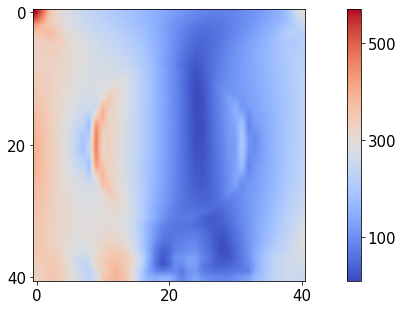

In [7]:
# Visualization
idx = 1

# training input
fig, ax = plt.subplots(1,1, figsize=(5,4))
grid = np.linspace(0,1,41)
im = ax.plot(grid, Inputs[:,idx], linewidth=2)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$u(x)$', size=25)
ax.set_xticks([0,1], fontsize=20)
ax.set_yticks([-250,0,250,500],fontsize=20)
plt.savefig('Structure_input.pdf', bbox_inches = 'tight')

# training output
fig, ax = plt.subplots(1,1, figsize=(15,5))
im = ax.imshow(y_train[idx].reshape(41,41), interpolation='bilinear', cmap= "coolwarm")
plt.grid(visible=False)
plt.xticks([0, 20,40], fontsize=15)
plt.yticks([0,20,40],fontsize=15)
cbar = fig.colorbar(im, ax=ax, ticks=[100, 300, 500])
cbar.ax.tick_params(labelsize=15)
plt.savefig('Structure_output.pdf', bbox_inches = 'tight')

In [40]:
######################## Cauchy random feature
# number of features
N = 4000
# scaling parameter gamma
gamma = 1e-4
# generate random feature matrix
x_train_RF, x_test_RF = RF_Cauchy(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-6)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 7.00e-02.

Clock time is 4.20 seconds


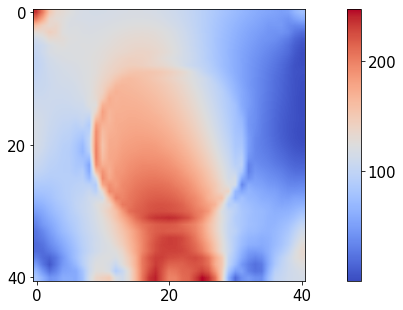

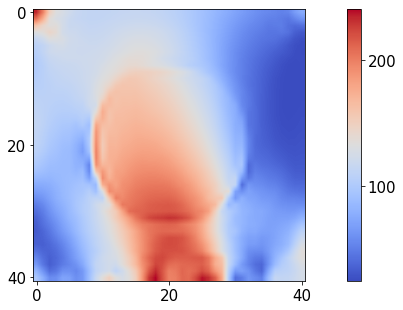

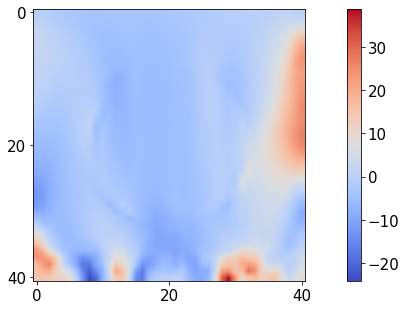

In [30]:
# Visualize the result
idx = 3

test = y_test[idx].reshape(41,41)
prediction = pred[idx].reshape(41,41)
error = prediction - test

# test
fig, ax = plt.subplots(1,1, figsize=(15,5))
im = ax.imshow(test, interpolation='bilinear', cmap= "coolwarm")
plt.grid(visible=False)
plt.xticks([0, 20,40], fontsize=15)
plt.yticks([0,20,40],fontsize=15)
cbar = fig.colorbar(im, ax=ax, ticks=[100, 200])
cbar.ax.tick_params(labelsize=15)
plt.savefig('Structural_test.pdf', bbox_inches = 'tight')

# prediction
fig, ax = plt.subplots(1,1, figsize=(15,5))
im = ax.imshow(prediction, interpolation='bilinear', cmap= "coolwarm")
plt.grid(visible=False)
plt.xticks([0, 20,40], fontsize=15)
plt.yticks([0,20,40],fontsize=15)
cbar = fig.colorbar(im, ax=ax, ticks=[100, 200])
cbar.ax.tick_params(labelsize=15)
plt.savefig('Structural_prediction.pdf', bbox_inches = 'tight')

# pointwise error
fig, ax = plt.subplots(1,1, figsize=(15,5))
im = ax.imshow(error, interpolation='bilinear', cmap= "coolwarm")
plt.grid(visible=False)
plt.xticks([0, 20,40], fontsize=15)
plt.yticks([0,20,40],fontsize=15)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=15)
plt.savefig('Structural_error.pdf', bbox_inches = 'tight')



In [7]:
## Gaussian random feature

from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge

rbf_feature = RBFSampler(gamma=1e-6, n_components = 5000)

X_train_RBF = rbf_feature.fit_transform(x_train)
X_test_RBF = rbf_feature.transform(x_test)

model = Ridge(alpha=1e-9)
start = time.time()
model.fit(X_train_RBF, y_train)
pred = model.predict(X_test_RBF)
end = time.time()
e = np.mean(np.linalg.norm(pred - y_test, axis = 1)/np.linalg.norm(y_test, axis = 1))

print(f'Prediction error is {e:.2e} \n')
print(f'Computation time is {end-start:.2f} seconds')


Prediction error is 6.25e-02 

Computation time is 5.84 seconds


## Low resolution and low data regime

In [45]:
# Get Data

Inputs = np.load('StructuralMechanics_inputs.npy')
Outputs = np.load('StructuralMechanics_outputs.npy')

# transpose it and then it is easy to reshape

Inputs = Inputs[:,0,:]
Outputs = Outputs.transpose((2,1,0))

# subsampling
Outputs = Outputs[:,::2,::2]

# flatten it

Inputs_fl = Inputs.T.reshape(len(Inputs.T), 41)
Outputs_fl = Outputs.reshape(40000, 21*21)


# train_test split
Ntrain = 1000
x_train = Inputs_fl[:Ntrain]
x_test = Inputs_fl[Ntrain:2000]

y_train = Outputs_fl[:Ntrain]
y_test = Outputs_fl[Ntrain:2000]

# check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1000, 41), (1000, 441), (1000, 41), (1000, 441))

In [67]:
######################## Cauchy random feature
# number of features
N = 50000
# scaling parameter gamma
gamma = 1e-4
# generate random feature matrix
x_train_RF, x_test_RF = RF_Cauchy(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-6)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 7.67e-02.

Clock time is 0.94 seconds


In [80]:
## Gaussian random feature

from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge

rbf_feature = RBFSampler(gamma=2e-6, n_components = 50000)

X_train_RBF = rbf_feature.fit_transform(x_train)
X_test_RBF = rbf_feature.transform(x_test)

model = Ridge(alpha=1e-9)
start = time.time()
model.fit(X_train_RBF, y_train)
pred = model.predict(X_test_RBF)
end = time.time()
e = np.mean(np.linalg.norm(pred - y_test, axis = 1)/np.linalg.norm(y_test, axis = 1))

print(f'Prediction error is {e:.2e} \n')
print(f'Computation time is {end-start:.2f} seconds')


Prediction error is 8.71e-02 

Computation time is 0.92 seconds


In [70]:
####################################### Gaussian kernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF

bandwidth = 100
kernel = RBF(length_scale = bandwidth)
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

start = time.time()
model.fit(x_train, y_train)
end = time.time()
pred = model.predict(x_test)

e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

print(f'Error is {e:.2e}. \n')
print(f'Computation time is {end-start:.2f} seconds')

Error is 1.03e-01. 

Computation time is 55.71 seconds


In [71]:
##################### Matern kernel
kernel = Matern(nu = 2.5, length_scale = 100)
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

start = time.time()
model.fit(x_train, y_train)
end = time.time()
pred = model.predict(x_test)

e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

print(f'Error is {e:.2e}. \n')
print(f'Computation time is {end-start:.2f} seconds')

Error is 7.73e-02. 

Computation time is 29.07 seconds
